# LESSON 3: LOGISTIC REGRESSION - SOFTMAX REGRESSION
<table><tr>
<td> <img src="../images/linear_logistic_regression_logo.jpeg" width="600px"/> </td>
</tr></table>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2017/01/27/logisticregression/)*

## 1. Logistic regression introduction

<img src="../images/logistic_regression_example.png" width="400px"/>

The prediction of linear regression is calculated by $\hat{y} = X{\theta}$. So the output of linear regression is a continuous value ranged from $- \infty$ to $+ \infty$.

Linear regression is modified to become **LOGISTIC REGRESSION** by apply a logistic activation function to the output of linear regression.

<center>
    $\hat{y} = \sigma(X{\theta})$
</center>


## 2. Logistic activation function
Sigmoid, Softmax and Tanh are logistic activation functions for classification problem.


### 2.1. Sigmoid

Sigmoid function get any input value and give an output in range from 0 to 1.

This value can be understand as probability.

<img src="../images/logistic_regression_sigmoid.png" width="300px"/>

### 2.2. Tanh

The difference between Sigmoid and Tanh is range of output value.

Tanh give an output in range from -1 to 1.

<img src="../images/logistic_regression_tanh.png" width="300px"/>

We can easily change the range of output value of tanh from $[-1, 1]$ to $[0, 1]$.

<center>
    \[
    \text{tanh}(z) = 2\sigma(2z) - 1
    \]
</center>

### 2.3. Softmax

Like Sigmoid, Softmax give an output in range from 0 to 1.

But, while Sigmoid is applied for each value independently, Softmax is applied for all the outputs.

<img src="../images/logistic_regression_softmax.jpeg" width="300px"/>

## 3. Loss function and Optimizer for Logistic Regression
We use sigmoid as logistic activation function for logistic regression.

With a sample ${x}^{i}$ in the dataset, we have $\sigma({x}^{i}{\theta})$ is a probability of sample ${x}^{i}$ belong to class 1 and $1 - \sigma({x}^{i}{\theta})$ is a probability of sample ${x}^{i}$ belong to class 0.

<center>
    \[
    P(y^i = 1 | x^i, \theta) = \sigma(\theta x^i) = \hat{y}^i \\
    P(y^i = 0 | x^i, \theta) = 1 - \sigma(\theta x^i) = 1 - \hat{y}^i
    \]
</center>

Combine two above functions, we have a new function to maximize

<center>
    \[
    P(y^i| x^i, \theta) = (\hat{y}^i)^{y^i} (1 - \hat{y}^i)^{(1 - y^i)} \\
    P(y|X, \theta) = \prod_{i=1}^m P(y^i| x^i, \theta) = \prod_{i=1}^m (\hat{y}^i)^{y^i} (1 - \hat{y}^i)^{(1 - y^i)}\\
    P(y|X, \theta) = (\hat{y})^{y} (1 - \hat{y})^{(1 - y)}
    \]
</center>

We need to find the ${\theta}$ to maximize the value of above function and this ${\theta}$ called an ***optimal point***.

<center>
    ${\theta}^{*} = \arg\max_{\theta} P(y|X, \theta)$
</center>

Every value $\hat{y}^i$ or $1 - \hat{y}^i$ is lower than 1.

Product of lots of these value can cause numerical error, because the product is almost equal to 0.

So we use logarit to change from product to sum, and add the negative sign to build a new loss function - ***CROSS ENTROPY LOSS FUNCTION***.

In logistic regression, we have 2 classes so we call it ***BINARY CROSS ENTROPY***.

<center>
    \[
    \mathcal{L}(\theta) = - \log (P(y|X, \theta)) \\
    = - (\log \hat{y}^{y} + \log(1 - \hat{y})^{(1 - y)}) \\
    = - (y \log \hat{y} + (1 - y) \log(1 - \hat{y})) \\
    = - \sum_i^m (y^i \log \hat{y}^i + (1 - y^i) \log(1 - \hat{y}^i))
    \]
</center>

Instead of finding ${\theta}^{*} = \arg\max_{\theta} P(y|X, \theta)$, we find ${\theta}^{*} = \arg\min_{\theta} - \log (P(y|X, \theta))$

To find the optimal point $\vec{\theta}^{*}$, we solve the equation:

<center>
    \[
    \frac{\partial \mathcal{L}}{\partial {\theta}}
    = \frac{\partial \mathcal{L}}{\partial {\sigma}} \cdot \frac{\partial \sigma}{\partial {\theta}}
    = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})} \cdot \frac{\partial \sigma}{\partial {\theta}}
    \]
</center>

We have $\sigma'(s) = \sigma(s) ( 1 - \sigma(s))$, so

<center>
    $\frac{\partial \sigma}{\partial \theta} = \hat{y}(1 - \hat{y})X$
</center>

And we have

<center>
    \[
    \frac{\partial \mathcal{L}}{\partial {\theta}}
    = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})} \cdot \hat{y}(1 - \hat{y})X
    = (\hat{y} - y)X \\
    \frac{\partial \mathcal{L}}{\partial {\theta}} = (\hat{y} - y)X
    \]
</center>

For each sample from the dataset,

<center>
    \[
    \frac{\partial \mathcal{L}(\theta, x^i, y^i)}{\partial {\theta}} = (\hat{y}^i - y^i)x^i
    \]
</center>

Using SGD, we have fomular to update parameters

<center>
    \[
    \theta = \theta + \eta(\hat{y}^i - y^i)x^i
    \]
</center>

## 4. Softmax regression
Using simple logistic regression, we only solve classification problem with only 1 class.

To solve multiple classes classification problem by using logistic regression, we have to build multiple logistic regression models. This model is called ***one-vs-rest***.

<img src="../images/softmax_regression_one_vs_rest.png" width="600px"/>

$a_i$ with i = 1, 2, 3 ... C are almost independent and their sum can be larger or smaller than 1.

<img src="../images/softmax_regression_softmax_net.png" width="700px"/>

<img src="../images/softmax_regression_example.png" width="700px"/>

Because we have to calculate $e^{z_i}$, if $z_i$ is large, $e^{z_i}$ will be very large and it causes value out of range error. We need to build a stable version of softmax.

<center>
    \[
    softmax(z^i)
    = \frac{e^{z_i}}{\sum_j^C e^{z_j}}
    = \frac{e^{-max_j(z_j)} * e^{z_i}}{e^{-max_j(z_j)} * \sum_j^C e^{z_j}}
    = \frac{e^{z_i - max_j(z_j)}}{\sum_j^C e^{z_j - max_j(z_j)}}
    \]
</center>

## 5. Loss function and Optimizer for Softmax regression
Instead of having only 2 classes like logistic regression, softmax regression has C classes and it need another form of cross entropy loss function.

Its name is ***CATEGORICAL CROSS ENTROPY***

<center>
    \[
    J(W; X, Y) = -\sum_{i=1}^N \sum_{j=1}^C y_{ji}\log(a_{ji})
    = -\sum_{i=1}^N \sum_{j=1}^C y_{ji}\log\frac{e^{{z}_i}}{\sum_{k=1}^C e^{{z}_k}}
    \]
</center>

For each sample from the dataset,
<center>
    \[
    J({W}; {x}_i, {y}_i)
    = -\sum_{j=1}^C y_{ji}\log\frac{e^{{z}_ji}}{\sum_{k=1}^C e^{{z}_ki}} \\
    = -\sum_{j=1}^C (y_{ji}{z}_ji - y_{ji}\log{\sum_{k=1}^C e^{{z}_ki}}) \\
    = -\sum_{j=1}^C y_{ji}{z}_ji + \sum_{j=1}^C y_{ji}\log{\sum_{k=1}^C e^{{z}_ki}} \\
    = -\sum_{j=1}^C y_{ji}{z}_ji + \log{\sum_{k=1}^C e^{{z}_ki}}
    \]
</center>

Note:
- $\sum_{j=1}^C y_{ji}=1$ because it's the sum of probability
- $\log{\sum_{k=1}^C e^{{z}_ki}}$ is independent with $j$ so we can remove $\sum_{j=1}^C$

To calculate derivative of $J$ with $W$, we can use the following fomular

<center>
    \[
    \frac{\partial J_i(W)}{\partial W} = [\frac{\partial J_i(W)}{\partial w_1}, \frac{\partial J_i(W)}{\partial w_2}, \dots, \frac{\partial J_i(W)}{\partial w_C}]
    \]
</center>

and gradient of each column can be calculated by

<center>
    \[
    \frac{\partial J_i(W)}{\partial w_j} 
    = -y_{ji}x_i + \frac{e^{z_ji} x_i}{\sum_{k=1}^C e^{z_ki}}
    = -y_{ji}x_i + a_{ji} x_i
    = x_i (a_{ji} - y_{ji})
    \]
</center>

Note:
- In the first equation, because we do derivative with $w_j$, all elements in $\sum_{k=1}^C e^{z_ki}$ are equal to 0 except $e^{z_ji}$
- $e_{ji} = a_{ji} - y_{ji}$ is the different between the prediction and the real value

Now, we have 

<center>
    \[
    \frac{\partial J_i(W)}{\partial W} = x_i[e_{1i}, e_{1i}, \dots, e_{ji}] = x_i e_i
    \]
</center>

and for the whole dataset

<center>
    \[
    \frac{\partial J(W)}{\partial W} = \sum_{i=1}^N x_i e_{i} = XE
    \]
</center>

Using SGD, we have fomular to update parameters

<center>
    \[
    W = W + \eta e_i x_i = W + \eta(a_{i} - y_{i})x_i
    \]
</center>

**To conclude, Logistic Regression is a special case of Softmax Regression!!!**

## 6. Implementation example

### 6.1. Prepare library and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris_df['setosa'] = iris_df.species.apply(lambda x: 1 if x == 'setosa' else 0)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [8]:
iris_setosa_df = iris_df[iris_df.setosa == 1]
iris_setosa_df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


In [10]:
iris_not_setosa_df = iris_df[iris_df.setosa == 0].sample(50, random_state=1)
iris_not_setosa_df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa
130,7.4,2.8,6.1,1.9,virginica,0
134,6.1,2.6,5.6,1.4,virginica,0
83,6.0,2.7,5.1,1.6,versicolor,0
131,7.9,3.8,6.4,2.0,virginica,0
143,6.8,3.2,5.9,2.3,virginica,0
67,5.8,2.7,4.1,1.0,versicolor,0
86,6.7,3.1,4.7,1.5,versicolor,0
132,6.4,2.8,5.6,2.2,virginica,0
119,6.0,2.2,5.0,1.5,virginica,0
115,6.4,3.2,5.3,2.3,virginica,0


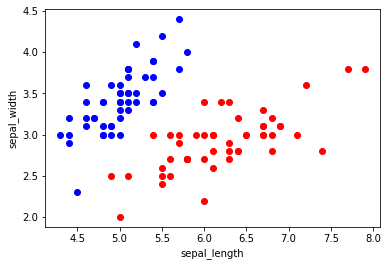

In [12]:
plt.plot(
    iris_not_setosa_df.sepal_length.to_list(),
    iris_not_setosa_df.sepal_width.to_list(),
    'ro'
)
plt.plot(
    iris_setosa_df.sepal_length.to_list(),
    iris_setosa_df.sepal_width.to_list(),
    'bo'
)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

### 6.2. Implement from scratch

### 6.3. Use `sklearn`

## 7. Homework